# Final Project FuseAI Fellowship
### Fetal Health Classification

#### Group Members: Elier Fajardo, Sarah Peña, Edith Gomez

Our project aims to leverage machine learning techniques to improve fetal health assessment, aligning with global efforts to reduce child and maternal mortality.

Our main goals are:

- Apply techniques for Data Cleansing, Feature Engineering and Data Visualization as an initial comprehension of the data.
- Utilize various machine learning algorithms to analyze and classify cardiotocograms (CTG) data into three fetal health states (Normal, Suspect, or Pathological) based on parameters like fetal heart rate, movements, and uterine contractions.

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif

### Dataset Summary Information

In [5]:
import pyprojroot

DATA_PATH = pyprojroot.here().joinpath('data', 'fetal_health.csv')
df = pd.read_csv(DATA_PATH)

In [ ]:
print('Dataset number of rows:', df.shape[0])
print('\nDataset number of columns:', df.shape[1])

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


**Fisrt, we will check if our dataset contains any duplicate rows that need to be handled**

In [5]:
# Checking for duplicate rows

duplicate_rows = df[df.duplicated()]
num_duplicates = df.duplicated().sum()

print("\nNumber of Duplicate Rows:", num_duplicates)
print("Duplicate Rows:")
duplicate_rows


Number of Duplicate Rows: 13
Duplicate Rows:


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
333,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,...,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
798,146.0,0.000,0.000,0.003,0.0,0.0,0.0,65.0,0.4,39.0,...,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
849,138.0,0.002,0.000,0.004,0.0,0.0,0.0,41.0,0.8,8.0,...,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0


In [6]:
# Drop duplicates
df = df.drop_duplicates()
print('Dataset number of rows:', df.shape[0])
print('\nDataset number of columns:', df.shape[1])

Dataset number of rows: 2113

Dataset number of columns: 22


**We succecssfully deleted the 13 duplicated rows of our dataset**

**Now, we will check fi the dataset contains any Null values.**

In [9]:
print("Number of Null Values per Column:\n")
df.isnull().sum()

Number of Null Values per Column:



baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

**There is no missing data in our dataset, therefore no need to handle missing values.**

In [13]:
print("Statistical Summary of the dataset:\n")
df.describe().T

Statistical Summary of the dataset:



,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,133.304780,9.837451,106.0,126.000,133.000,140.000,160.000
accelerations,2113.0,0.003188,0.003871,0.0,0.000,0.002,0.006,0.019
fetal_movement,2113.0,0.009517,0.046804,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2113.0,0.004387,0.002941,0.0,0.002,0.005,0.007,0.015
light_decelerations,2113.0,0.001901,0.002966,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2113.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2113.0,0.000159,0.000592,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2113.0,46.993848,17.177782,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2113.0,1.335021,0.884368,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2113.0,9.795078,18.337073,0.0,0.000,0.000,11.000,91.000


**We see that there is a scale difference between the variables, some of the range between 0 and 0.019, and ond others between 122 and 238. This shows the need for us to use scaling techniques before training any models to assure a good performance.**

**Additionally, based on the min and median of the variables, we observe that some of them appear to have skewness in their distribution, in specific we see more of a right skewness among the variables. This will be furthered observed by showing the histograms of each of the variables.**

In [17]:
print('Visualizing the data types:\n')
df.info()

Visualizing the data types:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_valu

### Exploratory Data Analysis

**First, let's see the distribution of our dataset variables by making a histogram for each one.**

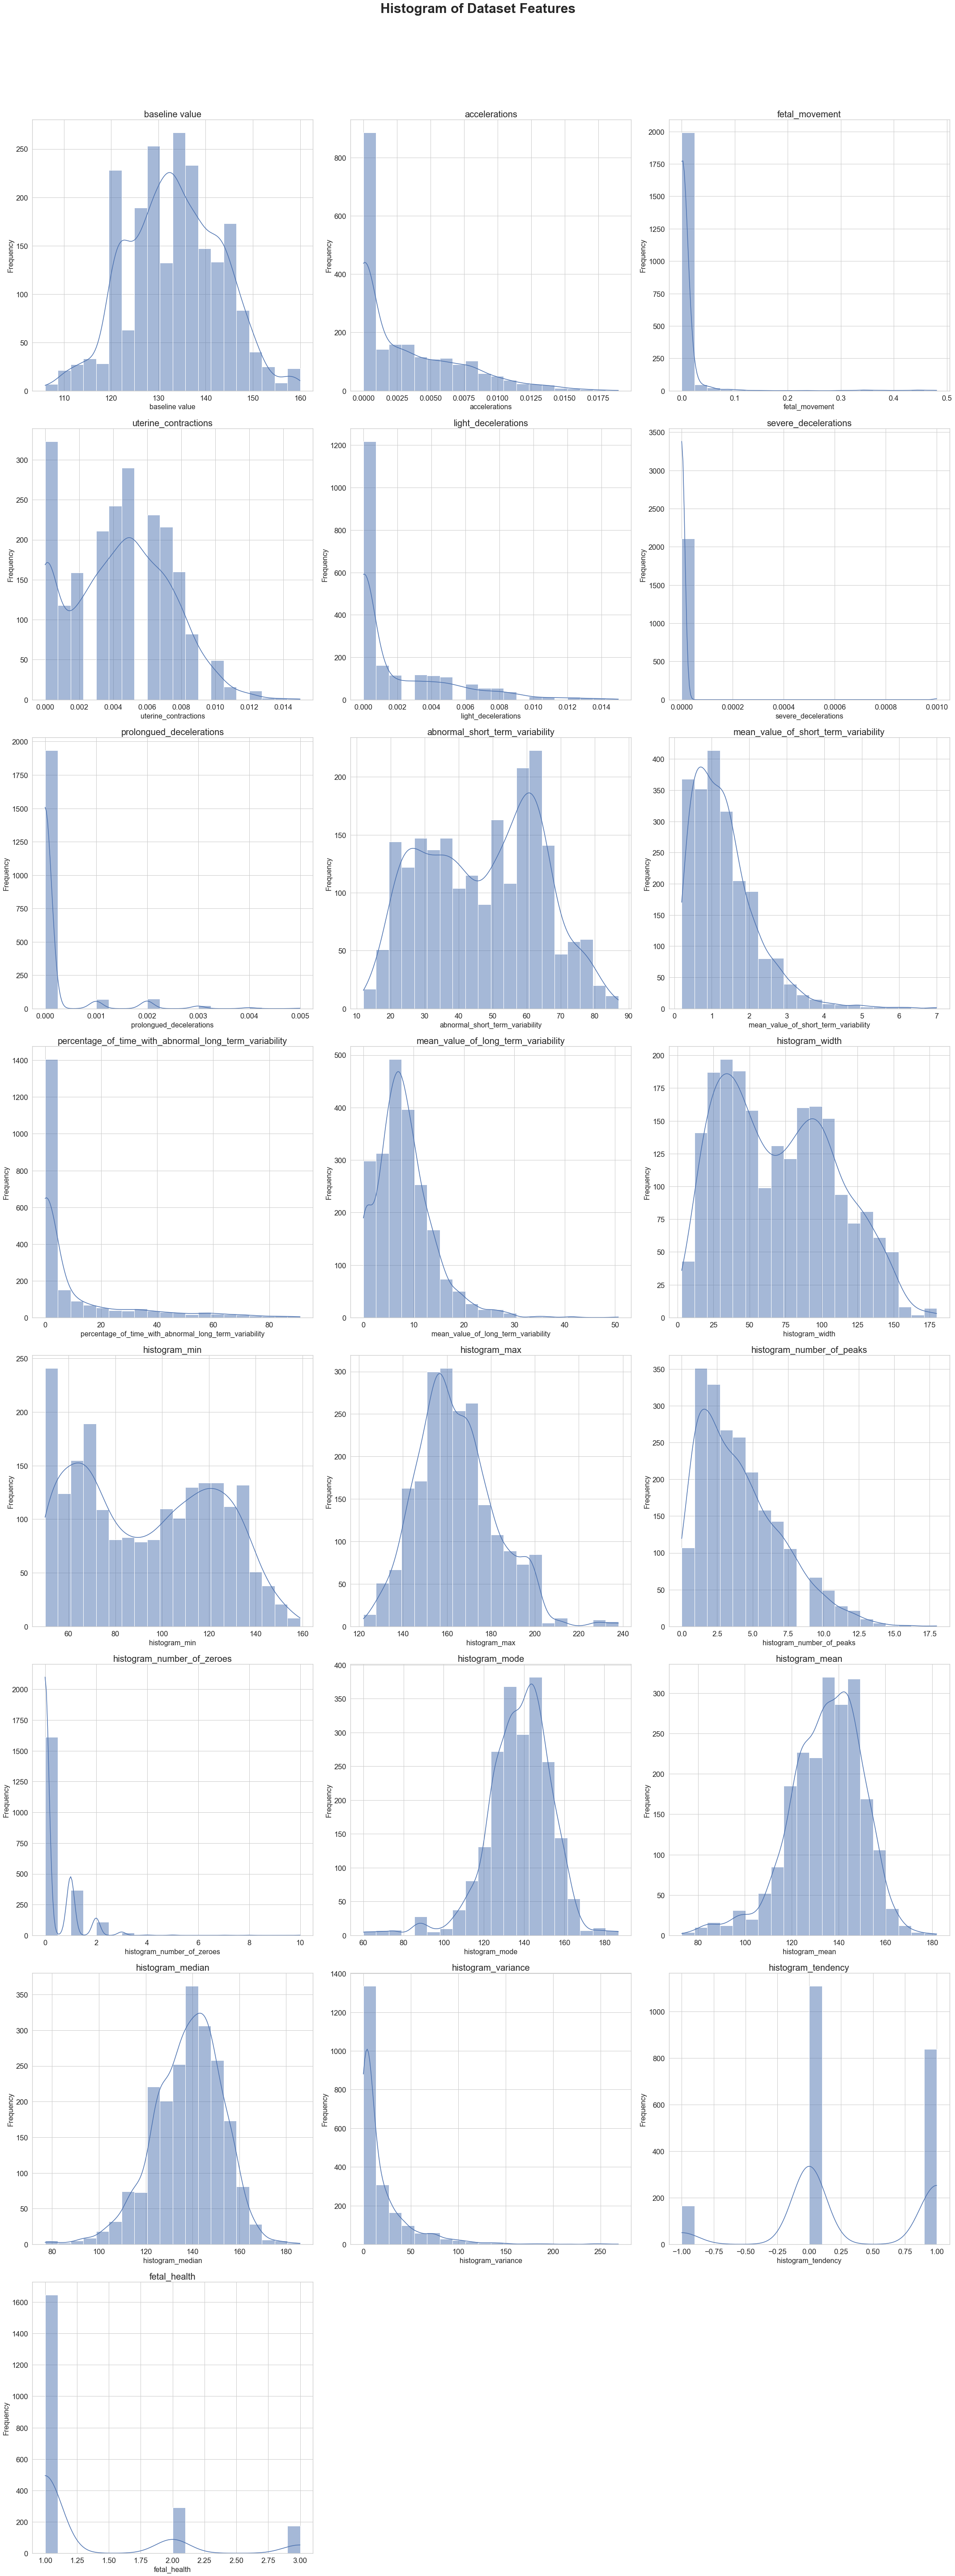

In [33]:
sns.set(style="whitegrid",font_scale=1.5)

num_columns = len(df.columns)
num_rows = int(np.ceil(num_columns / 3))
plt.figure(figsize=(30, 10 * num_rows))

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(column, fontsize=20)
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)

hist_features = plt.suptitle('Histogram of Dataset Features', y=1, fontsize=30, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

As we saw had assumed before, here we can see that some of the features have skewness. Additionally, we observe that some other features have a normal-like distribution.

For the fetal health feature, we see tha there is some class imbalance within the dataset. We will make this graph alone to see which category is predominant.

**Target Variable: Fetal_Health**

From the dataset description, we know that the labels of the fetal_health variables are as follows:
    
    1: normal
    2: suspect
    3: pathological

We will create a new column with these labels for better understanding of the data.

In [ ]:
# Creating the labels
label_mapping = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
df['fetal_health_label'] = df['fetal_health'].map(label_mapping)

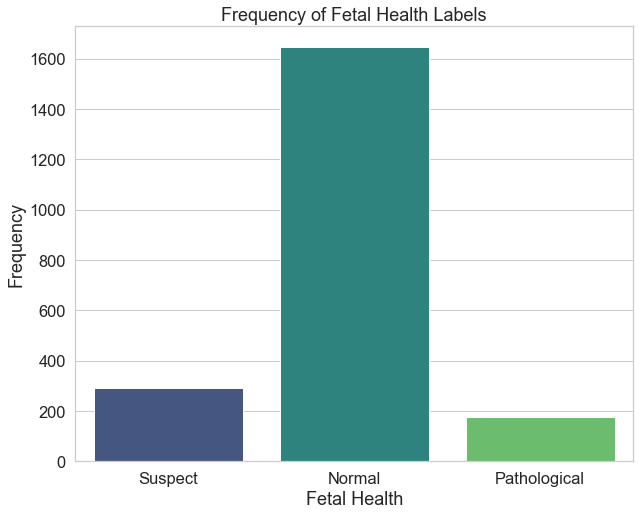

In [39]:
#plotting the data
sns.set(style="whitegrid", font_scale=1.5)

plt.figure(figsize=(10, 8))
sns.countplot(x='fetal_health_label', data=df, palette='viridis')

plt.xlabel('Fetal Health')
plt.ylabel('Frequency')
plt.title('Frequency of Fetal Health Labels')

# Show the plot
plt.show()

We see that the normal class has around 1,600 instances, while the Suspect and Pathological categories only have around 200 data instances. We will need to implement some data balancing technique in order to accurately train our models.

Now we will see the differences between the variables for each class by looking at multiple boxplots. We want to observe if there is a significant difference between each class.

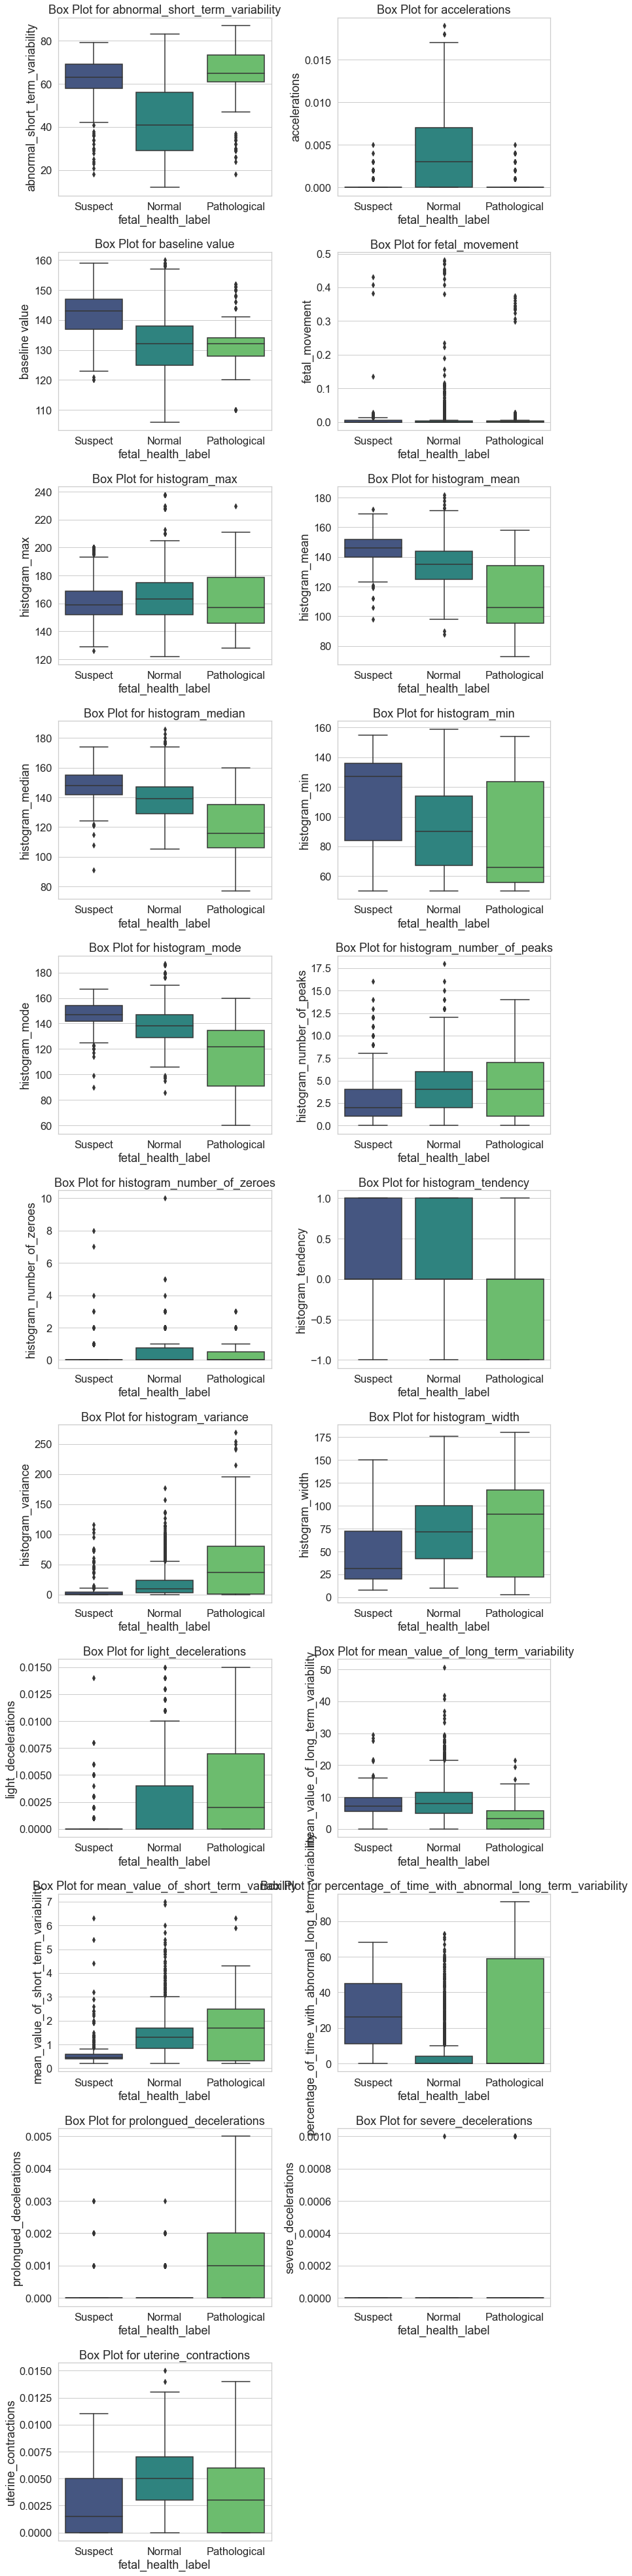

In [55]:
num_cols = 2
num_rows = len(features) // num_cols + len(features) % num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x='fetal_health_label', y=feature, data=df, palette='viridis', ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot for {feature}')

for i in range(len(features), num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

By looking at the boxplots we see that there is more differences between the classes regarding the histogram variables. Also, there is notorious differences between the classes regarding accelerations and the mean_value_of_long_term_variability.

We could confirm this further by seeing the correlation between the target variable and the rest of the dataset.

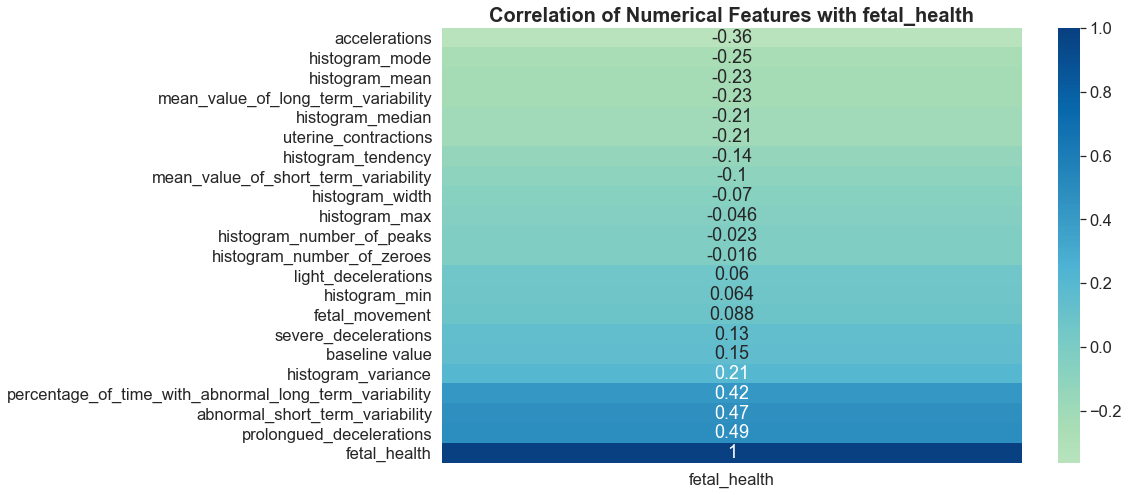

In [63]:
correlation_matrix = df.corr()['fetal_health']
plt.figure(figsize=(13, 8))

sns.heatmap(correlation_matrix.sort_values().to_frame(), annot=True, cmap='GnBu', center=0)

plt.title("Correlation of Numerical Features with fetal_health",fontsize=20,fontweight="bold")
plt.show()

By looking at the correlations with fetal_health, we confirm that there is a higher correlation with acceleration, histogram mode and mean, prolongues decelerations and abnormal short term variability.

If we concentrate on the varibales that provide the most information, it might be possible for us later to create a model that makes correct classifications by only using a subset of the features.

Now, lets observe at the ranges of the features

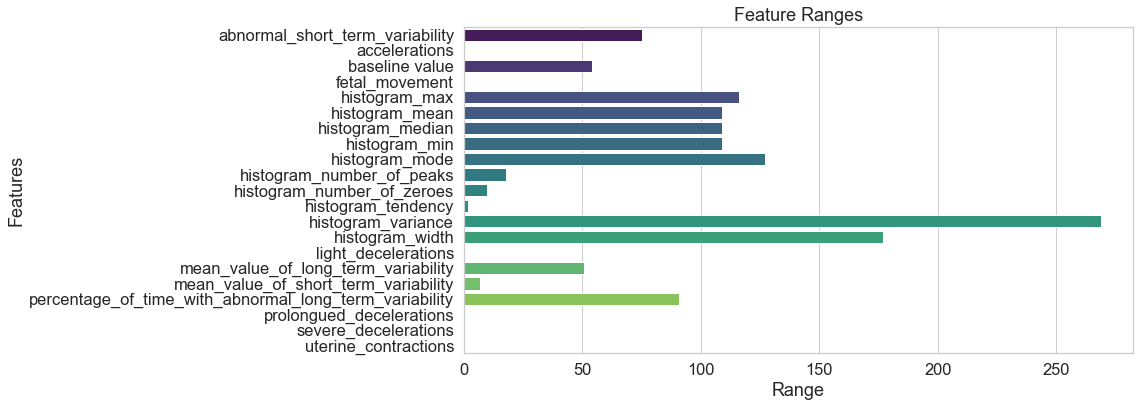

In [64]:
#features = df.columns.difference(['fetal_health', 'fetal_health_label'])
plt.figure(figsize=(12, 6))
sns.barplot(x=df[features].max() - df[features].min(), y=features, palette='viridis')

plt.xlabel('Range')
plt.ylabel('Features')
plt.title('Feature Ranges')

plt.show()

Text(0.5, 1.0, 'Box Plots of Features')

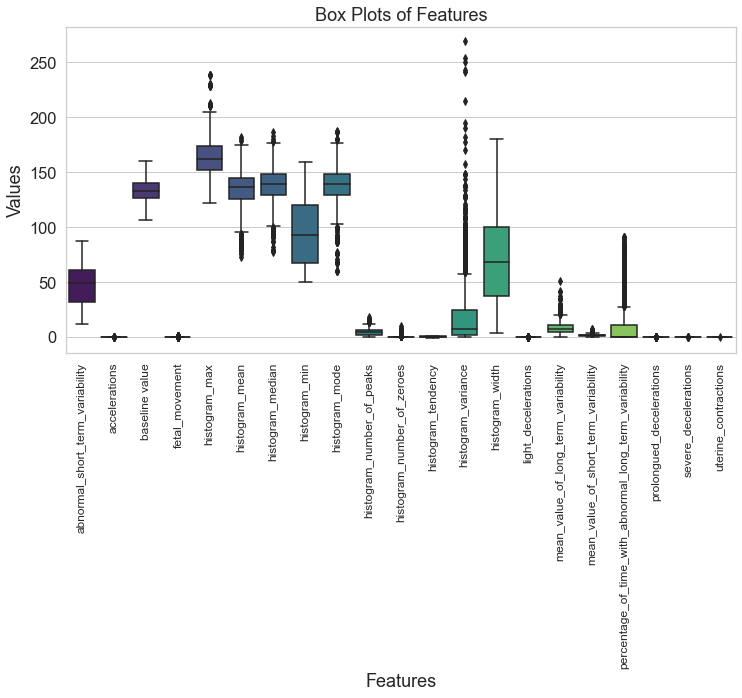

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[features], palette='viridis')

plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90, fontsize=12)
plt.title('Box Plots of Features')

In the charts above it is clear to see the scaling difference between the variable sin the dataset. We observe some simiarities in the distribution of the histogram variables. 

The feature with major variability is histogram variances. While the features regarding accelerations, contractions and fetal movement present little range of variation.

Lastly, lets observe if there is correlation between the sets of features, indicating that using all of them might not be helpul for our models.

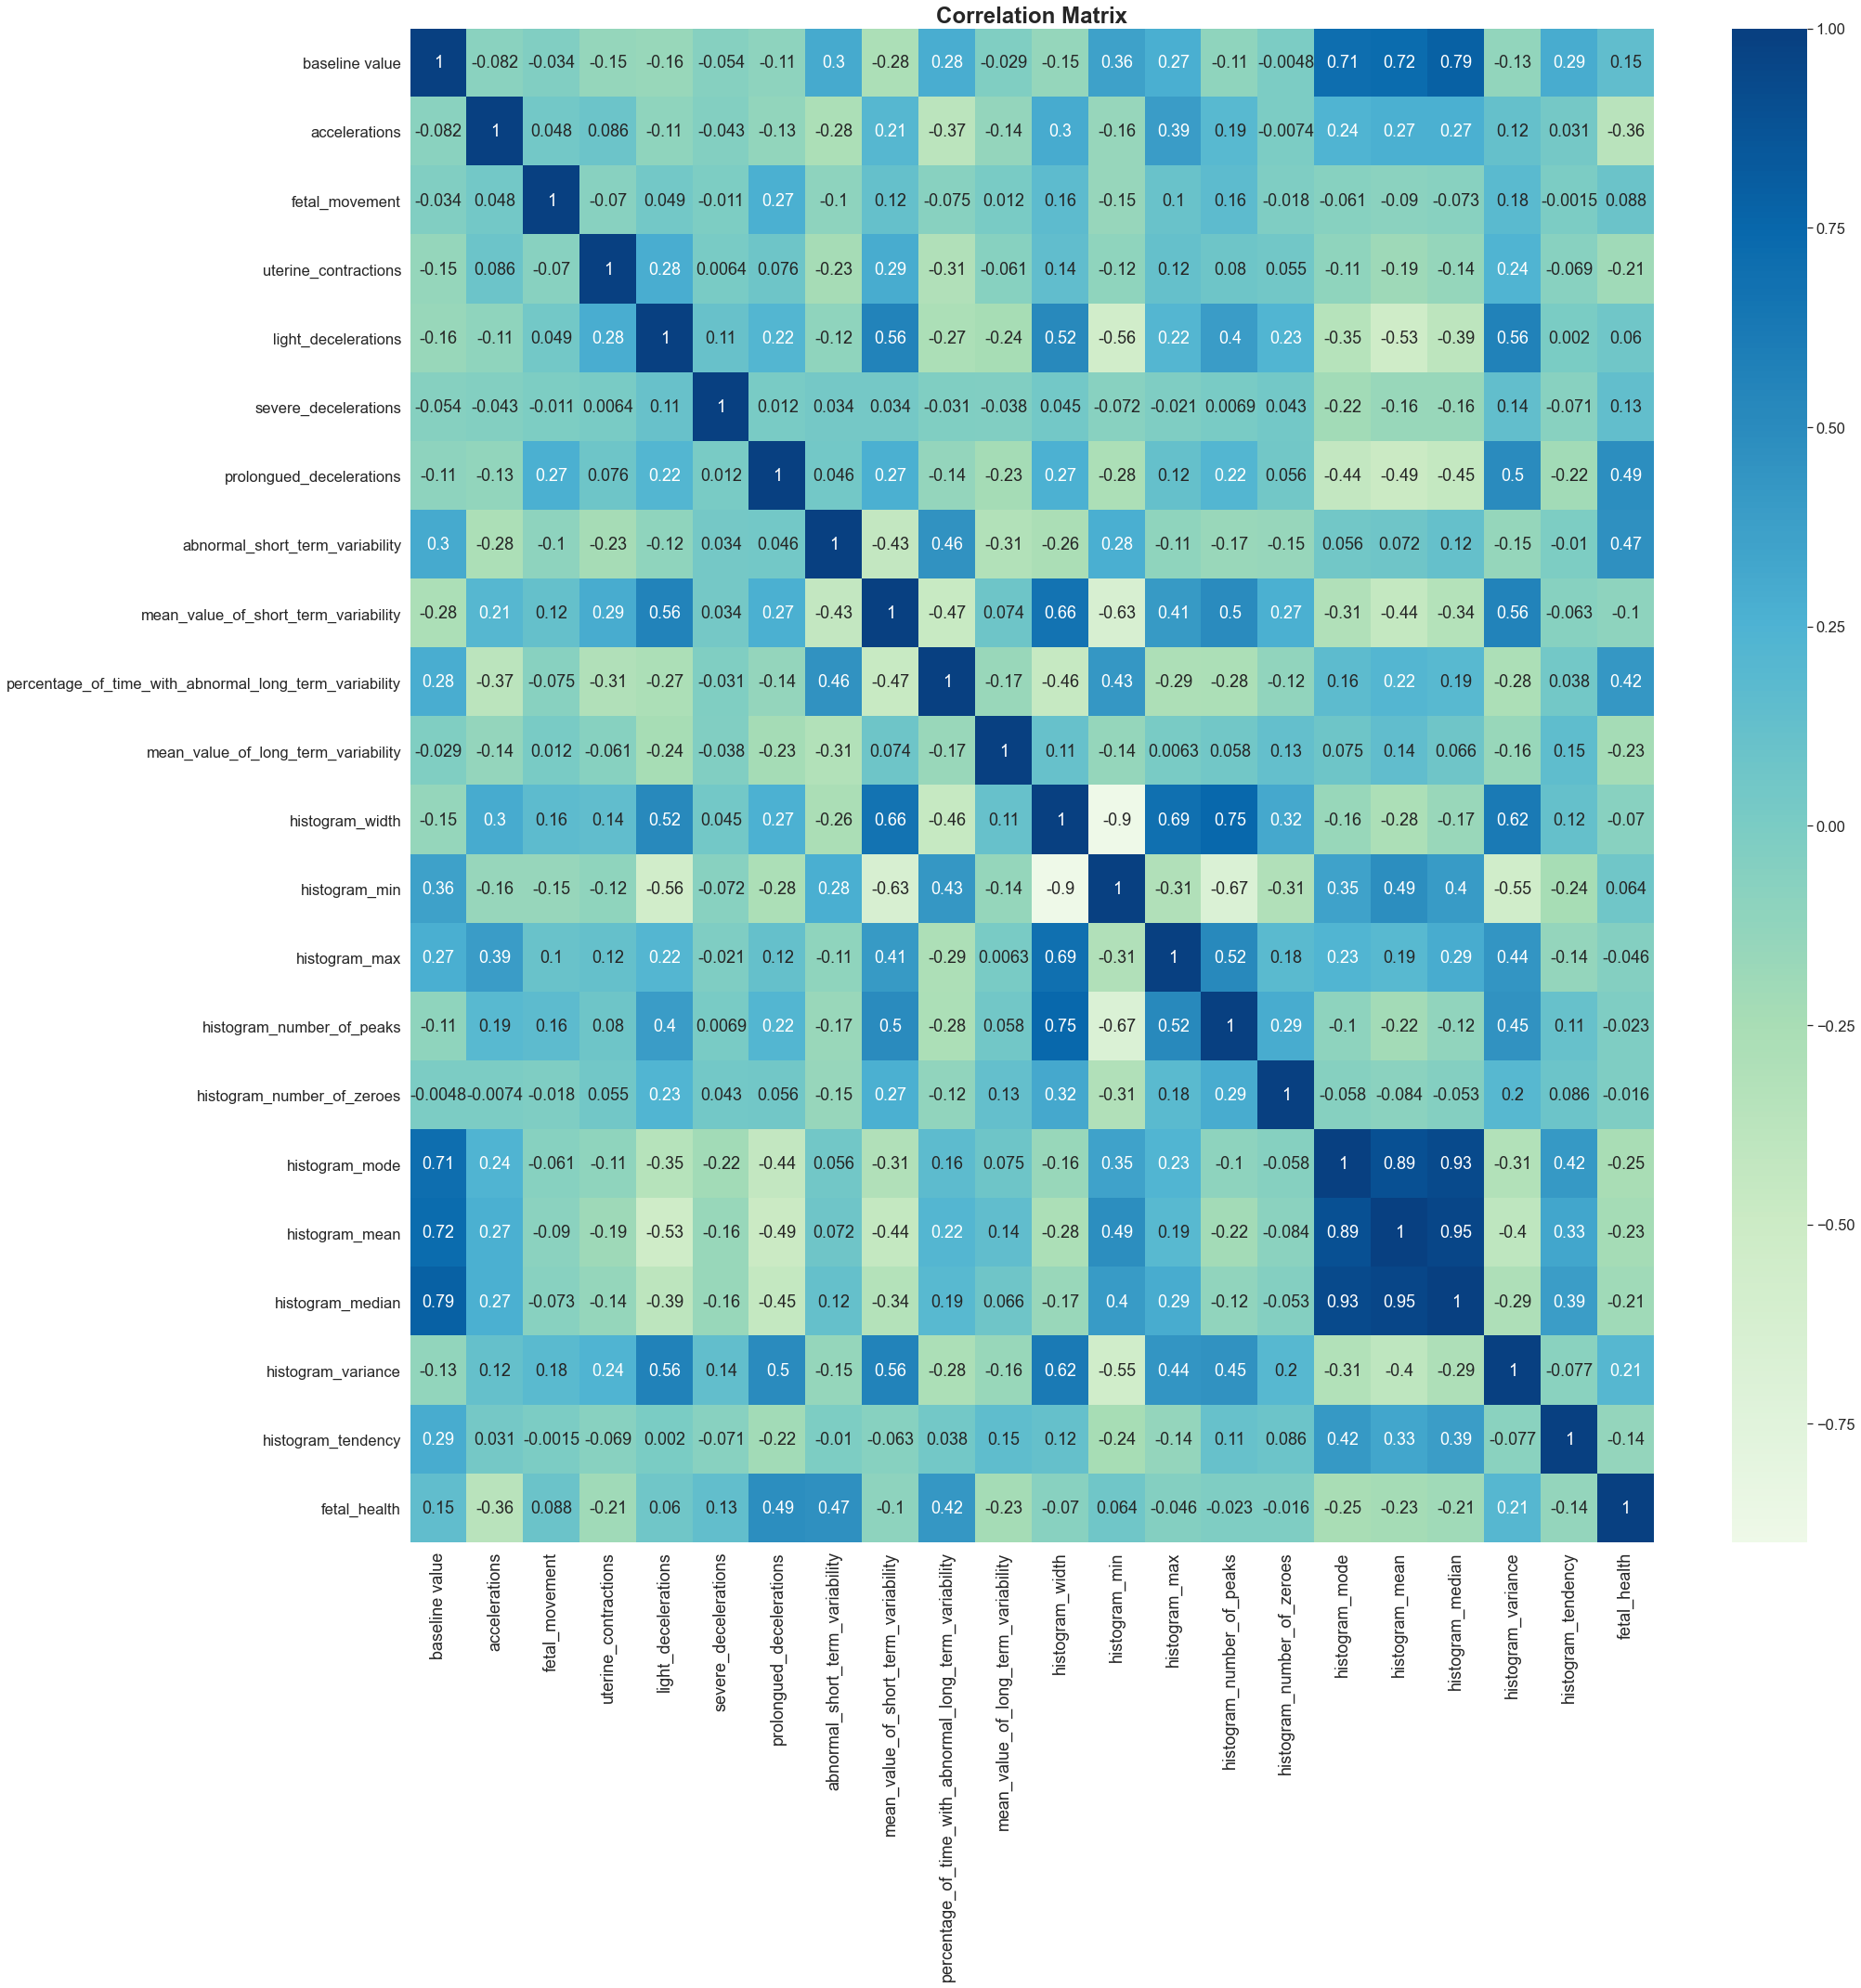

In [72]:
corr_matrix = df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='GnBu', center=0, annot_kws={'size': 18})
plt.xticks(fontsize=18)
plt.title('Correlation Matrix',fontsize=24,fontweight='bold')
plt.show()

we observe a high correlation between the histogram mode, median and mean, which is understandable since we earlier saw that some of the features have a normal distribution. Maybe using both of these variables might not give us much information for the classification task. We also see and elevated correlation between the baseline values and the histogram mode, median and mean. 

As a median correlation, we see the histogram variance with the light and prolongued deccelerations as well as with the histogram width and the mean value of short term variability.

Based on the correlation matrix it will be necessary to perform feature selectio for us beign able to implement our machine learning solutions.

### Data Preprocessing

#### Feature Selection

We will use the K Best method to select the top 10 features.

The SelectKBest algorithm operates by evaluating each feature individually using a specified scoring function and selecting the top k features with the highest scores. The choice of the scoring function depends on the type of the problem (classification or regression) and the nature of the data.

For classification tasks, the f_classif (ANOVA F-value between labels and features) and chi2 (chi-squared statistic) are common scoring functions used with SelectKBest. 

In [91]:
X = df[df.columns.difference(['fetal_health', 'fetal_health_label'])]
y = df['fetal_health']

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

print("Original features:\n")
print(X.columns.values)

Original features:

['abnormal_short_term_variability' 'accelerations' 'baseline value'
 'fetal_movement' 'histogram_max' 'histogram_mean' 'histogram_median'
 'histogram_min' 'histogram_mode' 'histogram_number_of_peaks'
 'histogram_number_of_zeroes' 'histogram_tendency' 'histogram_variance'
 'histogram_width' 'light_decelerations'
 'mean_value_of_long_term_variability'
 'mean_value_of_short_term_variability'
 'percentage_of_time_with_abnormal_long_term_variability'
 'prolongued_decelerations' 'severe_decelerations' 'uterine_contractions']


In [90]:
print("\nSelected features:\n")
print(selected_features.values)


Selected features:

['abnormal_short_term_variability' 'accelerations' 'baseline value'
 'histogram_mean' 'histogram_median' 'histogram_mode' 'histogram_variance'
 'mean_value_of_short_term_variability'
 'percentage_of_time_with_abnormal_long_term_variability'
 'prolongued_decelerations']


In [95]:
scores = selector.scores_
print("Scores for all features:\n")
for feature, score in zip(X.columns, scores):
    print(f"{feature}: {score}")

Scores for all features:

abnormal_short_term_variability: 337.7030199545105
accelerations: 194.61834456462987
baseline value: 137.83399855064042
fetal_movement: 11.700711513464007
histogram_max: 2.5233500696662268
histogram_mean: 298.7595689966558
histogram_median: 249.69952302837916
histogram_min: 86.46843974071147
histogram_mode: 276.3827945214624
histogram_number_of_peaks: 11.72682791635911
histogram_number_of_zeroes: 2.1349009099961065
histogram_tendency: 44.85418560082552
histogram_variance: 150.95582652388705
histogram_width: 54.21560462491573
light_decelerations: 66.75034379814208
mean_value_of_long_term_variability: 69.41893972548186
mean_value_of_short_term_variability: 118.05046263370849
percentage_of_time_with_abnormal_long_term_variability: 335.38615648598324
prolongued_decelerations: 507.304308686665
severe_decelerations: 28.438836621823622
uterine_contractions: 93.6474737850225
